In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Using TensorFlow backend.


8


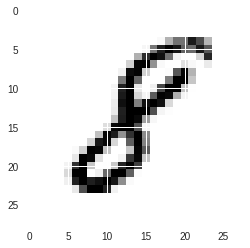

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

#selecting a random image from the dataset
image_index = 7777 

# print the label
print(y_train[image_index])

#show the image
plt.imshow(x_train[image_index], cmap='Greys') 

In [4]:
#show the shape of the data set
x_train.shape

(60000, 28, 28)

In [5]:
# flatten 28*28 images to a 784 vector for each image
# reshaping the data so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
#x_train and x_test parts contain greyscale RGB codes (from 0 to 255) 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize inputs from 0-255 to 0-1
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [6]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Activation
from keras.layers.normalization import BatchNormalization
from keras import backend as K

K.set_image_dim_ordering('th')

# Creating a Sequential Model and adding the layers
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=input_shape, kernel_size=(11,11),strides=(4,4), padding='same'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(28*28*1,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

#Dropout layers fight with the overfitting by disregarding some of the neurons
model.add(Dropout(0.2))

#final Dense layer must have 10 neurons
model.add(Dense(10,activation=tf.nn.softmax))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 7, 1)          325344    
_________________________________________________________________
activation_1 (Activation)    (None, 96, 7, 1)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 96, 4, 1)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 4, 1)          4         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 4, 1)         2973952   
_________________________________________________________________
activation_2 (Activation)    (None, 256, 4, 1)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 256, 2, 1)         0         
__________

In [7]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

hist = model.fit(x=x_train,y=y_train, batch_size=512, epochs=10,validation_data=(x_test, y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 25s 411us/step - loss: 0.2956 - acc: 0.9122 - val_loss: 0.1866 - val_acc: 0.9612
Epoch 2/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.1043 - acc: 0.9675 - val_loss: 0.2146 - val_acc: 0.9517
Epoch 3/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.0749 - acc: 0.9773 - val_loss: 0.1036 - val_acc: 0.9760
Epoch 4/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.0574 - acc: 0.9822 - val_loss: 0.1091 - val_acc: 0.9723
Epoch 5/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.0463 - acc: 0.9854 - val_loss: 0.0999 - val_acc: 0.9756
Epoch 6/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.0405 - acc: 0.9874 - val_loss: 0.0957 - val_acc: 0.9756
Epoch 7/10
60000/60000 [==============================] - 17s 292us/step - loss: 0.0360 - acc: 0.9884 - val_loss: 0.

In [8]:
scores = model.evaluate(x_test, y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

10000/10000 [==============================] - 4s 358us/step
CNN Error: 2.37%


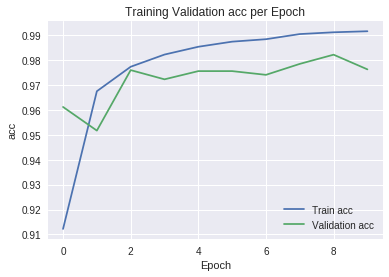

In [9]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

# Plot legend and use the best location automatically: loc = 0
plt.legend(["Train acc", "Validation acc"], loc = 'lower right')
plt.title("Training Validation acc per Epoch")
plt.xlabel("Epoch")
plt.ylabel("acc")
plt.show()

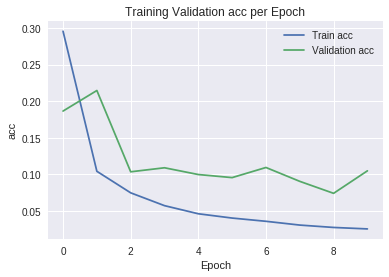

In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

# Plot legend and use the best location automatically: loc = 0
plt.legend(["Train acc", "Validation acc"], loc = 'upper right')
plt.title("Training Validation acc per Epoch")
plt.xlabel("Epoch")
plt.ylabel("acc")
plt.show()